# SC1015 Cardiovascular Problem Statement

---

### Predicting the risks of cardiovascular diseases for males between the height of 165cm to 175cm, in the weight range of 60kg to 90kg, based on whether he smokes, drinks alcohol, is active, or has high cholesterol.

In [1]:
import numpy as np 
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Import ML lib
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('heart_data.csv')
data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Cleaning Of Data
#### Cleaning Steps
    1. Height Between 165cm and 175cm
        Average Singaporean Height is around 168cm
    2. Weight Between 60Kg and 90Kg
    3. Convert Age from Days to Years

In [3]:
cleanHeight = data.query('height > 165 and height < 175')
cleanHeight

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
10,10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0
11,11,16,18815,2,173,60.0,120,80,1,1,0,0,1,0
15,15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1
69990,69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69993,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0


In [4]:
cleanWeight = cleanHeight.query('weight > 60 and weight < 90')
cleanWeight

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
10,10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0
16,16,25,21296,1,170,75.0,130,70,1,1,0,0,0,0
24,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1
69990,69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69993,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0


In [5]:
cleaned = cleanWeight.query('gender == 1')
cleaned

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10,10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0
16,16,25,21296,1,170,75.0,130,70,1,1,0,0,0,0
24,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1
31,31,43,23186,1,169,71.0,140,90,3,1,0,0,1,1
49,49,64,16045,1,170,69.0,120,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69974,69974,99962,18226,1,168,75.0,120,80,1,1,0,0,1,0
69977,69977,99965,16843,1,168,75.0,120,79,1,1,0,0,1,0
69990,69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69993,69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1


In [6]:
#Converting Age from Days to Years
for i, row in cleaned.iterrows():
    cleaned.at[i,'age'] = cleaned.at[i,'age'] // 365
cleaned.head()
cleaned.describe()
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 10 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8079 non-null   int64  
 1   id           8079 non-null   int64  
 2   age          8079 non-null   int64  
 3   gender       8079 non-null   int64  
 4   height       8079 non-null   int64  
 5   weight       8079 non-null   float64
 6   ap_hi        8079 non-null   int64  
 7   ap_lo        8079 non-null   int64  
 8   cholesterol  8079 non-null   int64  
 9   gluc         8079 non-null   int64  
 10  smoke        8079 non-null   int64  
 11  alco         8079 non-null   int64  
 12  active       8079 non-null   int64  
 13  cardio       8079 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1.2 MB


In [7]:
#Check for any null values
cleaned.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### There are no null values in this dataset, hence we can proceed.

In [8]:
cleaned

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10,10,15,61,1,169,80.0,120,80,1,1,0,0,1,0
16,16,25,58,1,170,75.0,130,70,1,1,0,0,0,0
24,24,35,45,1,170,68.0,150,90,3,1,0,0,1,1
31,31,43,63,1,169,71.0,140,90,3,1,0,0,1,1
49,49,64,43,1,170,69.0,120,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69974,69974,99962,49,1,168,75.0,120,80,1,1,0,0,1,0
69977,69977,99965,46,1,168,75.0,120,79,1,1,0,0,1,0
69990,69990,99986,41,1,168,72.0,110,70,1,1,0,0,1,1
69993,69993,99991,53,1,172,70.0,130,90,1,1,0,0,1,1


# Visualisation of Data Before and After cleaning
## Before

<AxesSubplot:xlabel='age'>

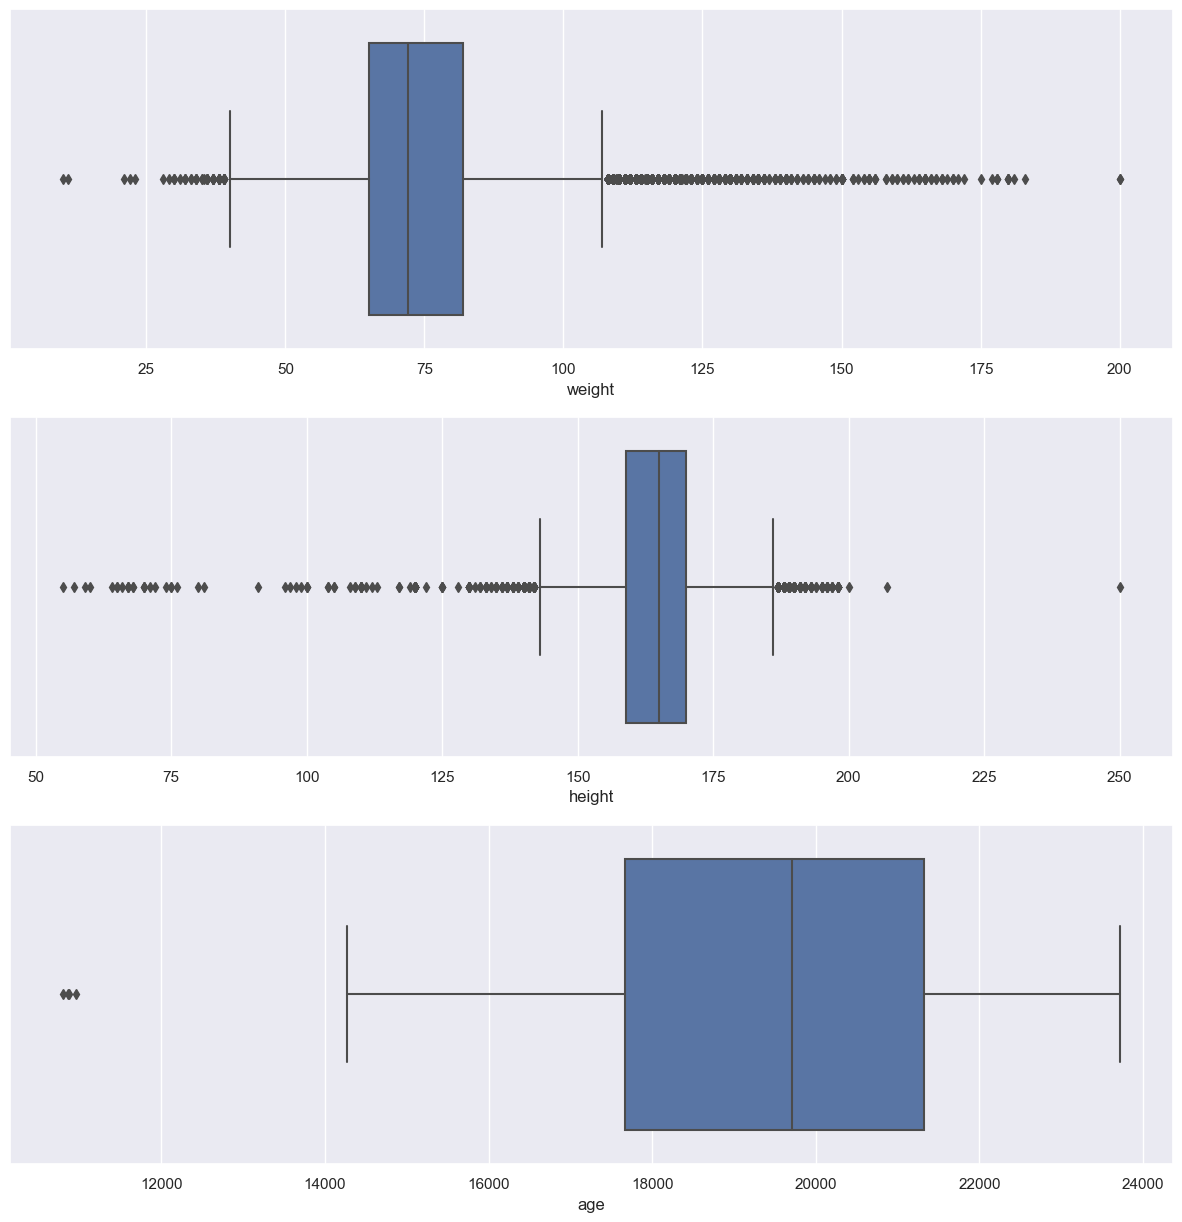

In [9]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(data = data, x = 'weight', ax = axes[0])
sb.boxplot(data = data, x = 'height', ax = axes[1])
sb.boxplot(data = data, x = 'age', ax = axes[2])

## After

<AxesSubplot:xlabel='age'>

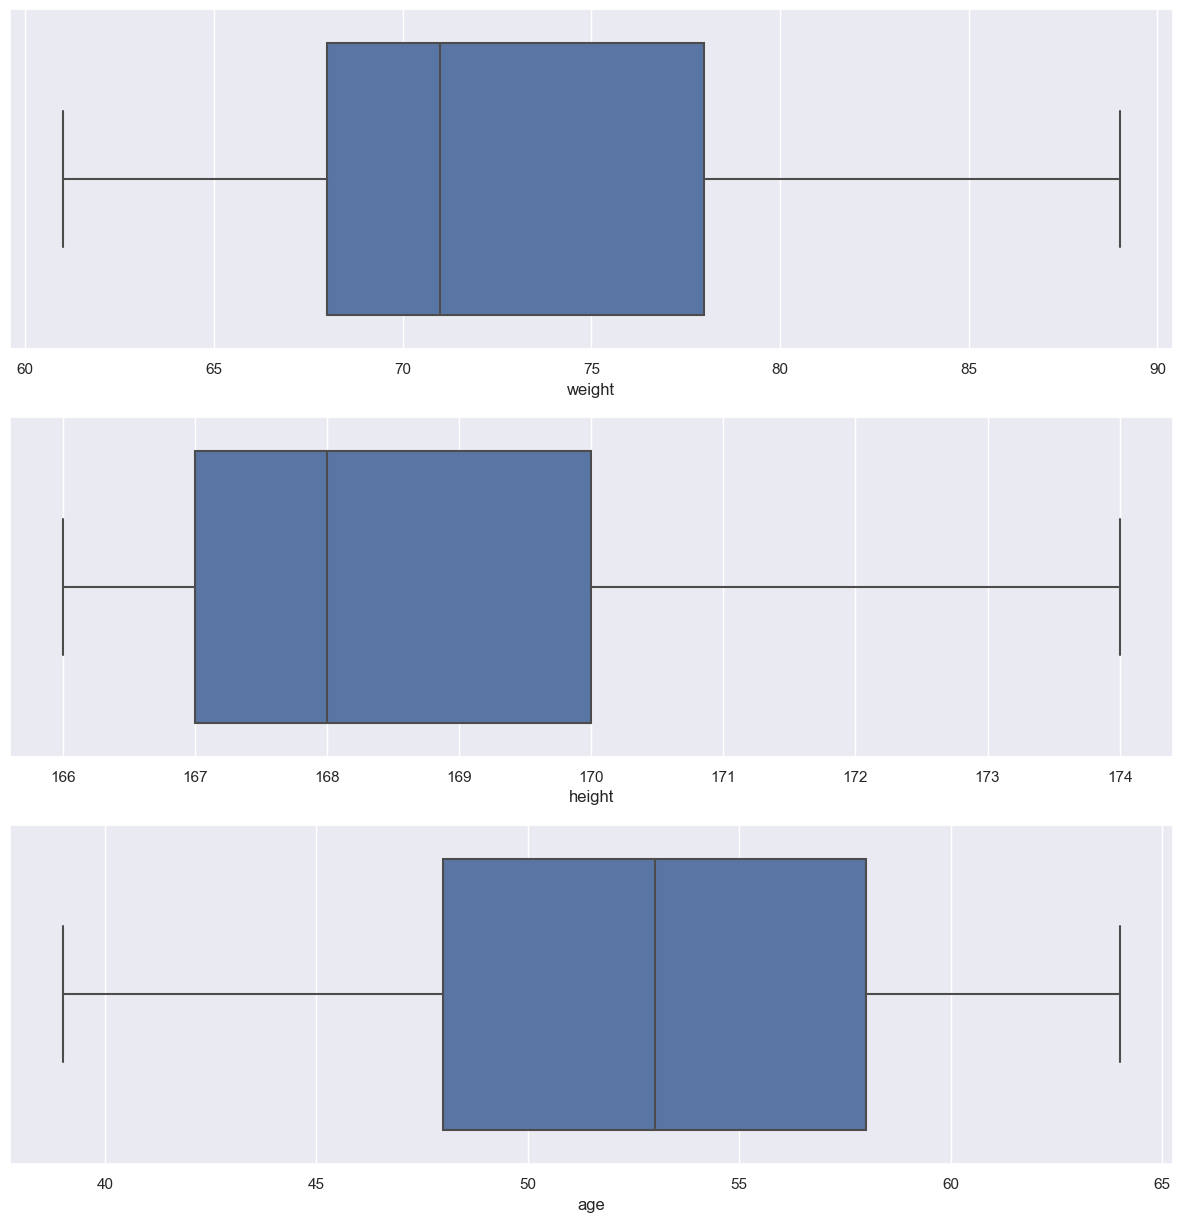

In [10]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(data = cleaned, x = 'weight', ax = axes[0])
sb.boxplot(data = cleaned, x = 'height', ax = axes[1])
sb.boxplot(data = cleaned, x = 'age', ax = axes[2])

# Exploratory Data Analysis

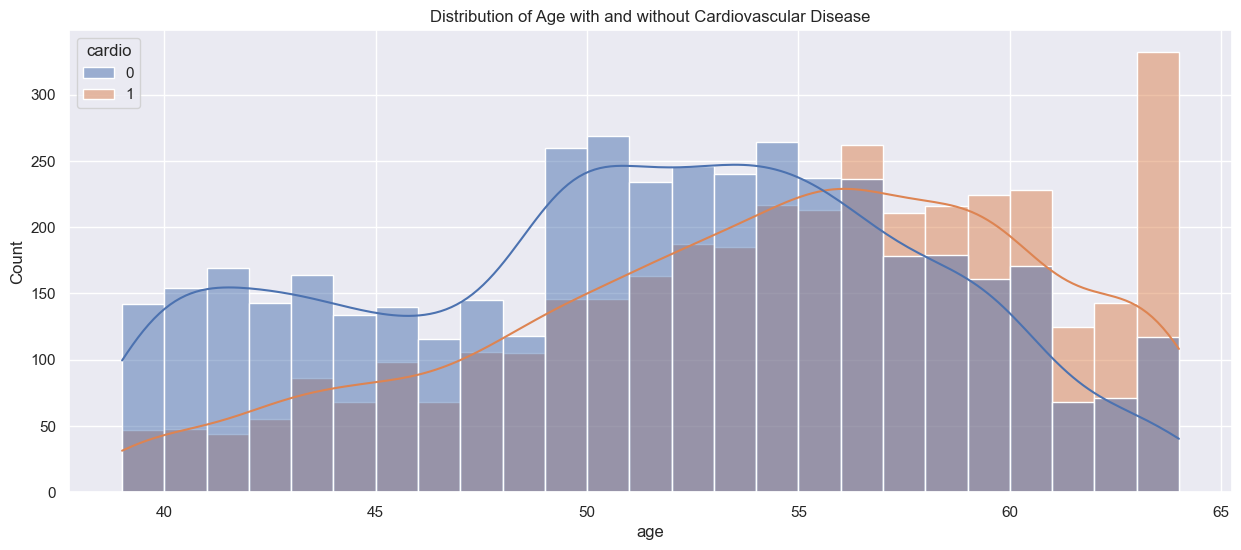

In [11]:
plt.figure(figsize=(15,6))
sb.histplot(data=cleaned, x='age',hue='cardio', binwidth = 1, kde=True)
plt.title("Distribution of Age with and without Cardiovascular Disease")
plt.show()

### From above, we can see that the risk of getting cardiovascular diseases generally increases as one gets older. Past the age of 56 years, there are more males with cardiovascular diseases than males without.

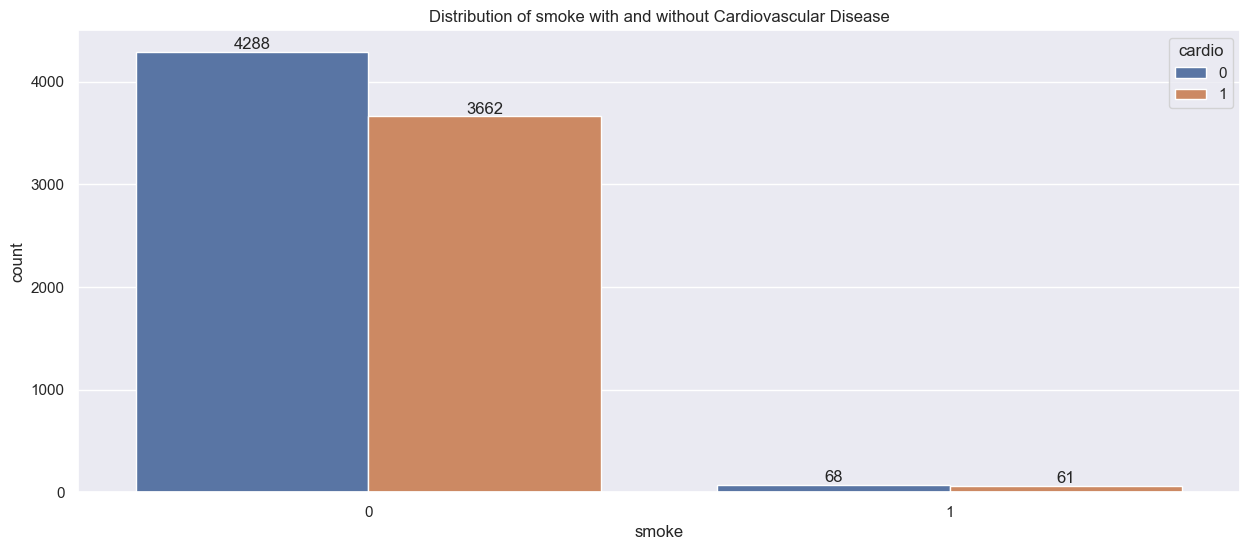

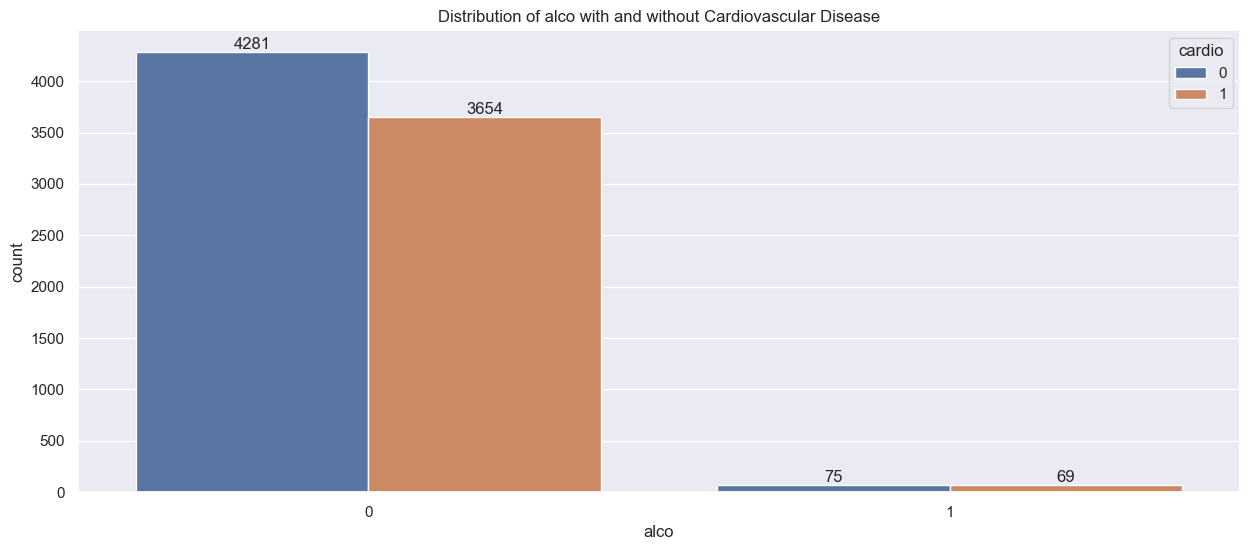

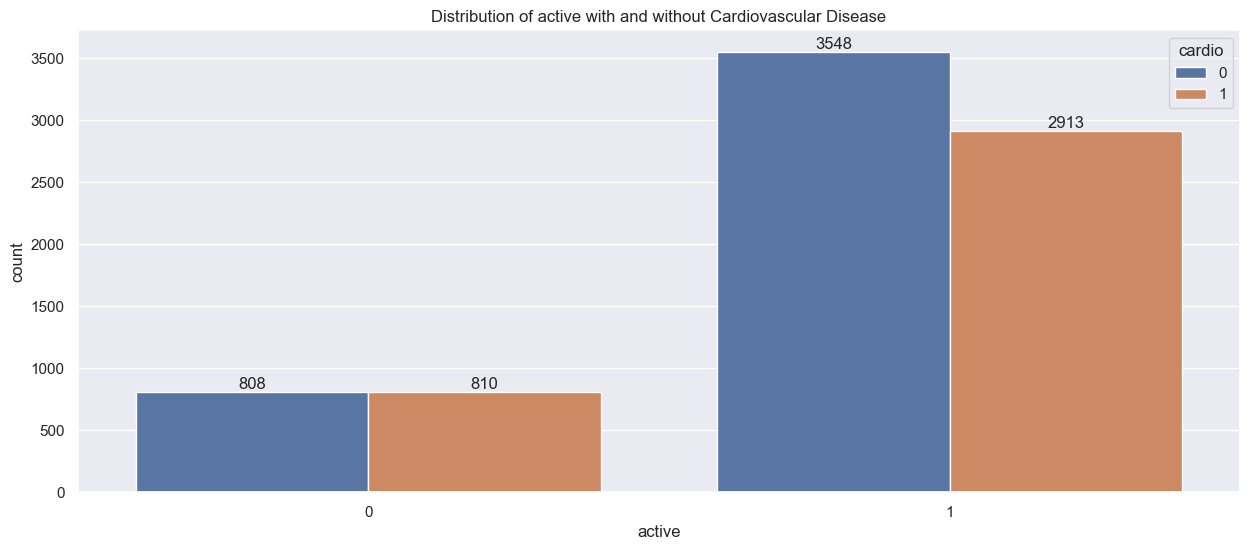

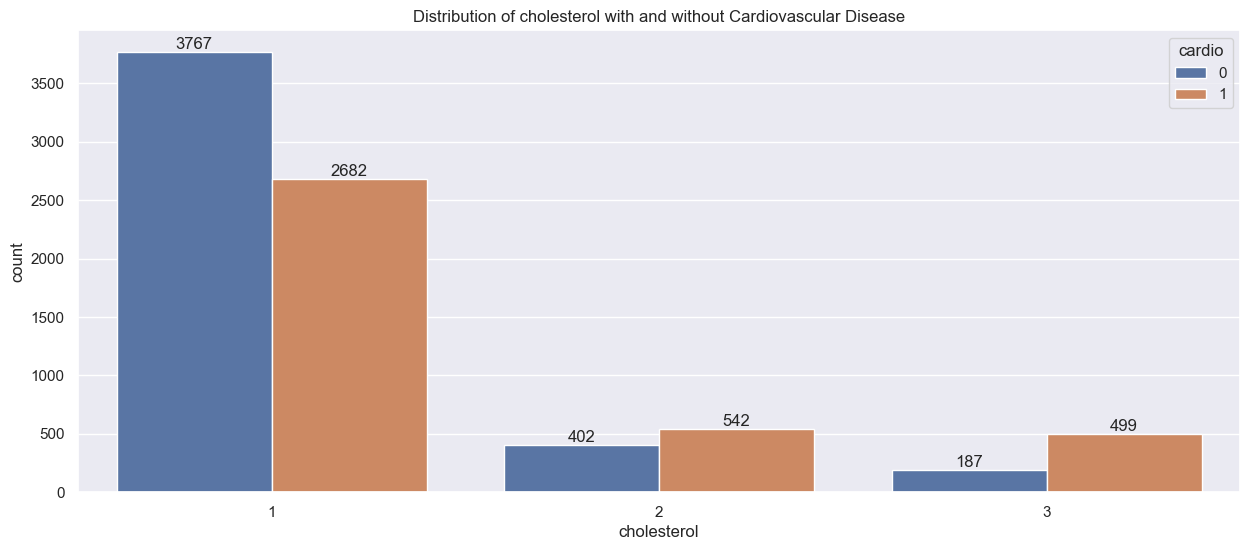

In [12]:
list = ["smoke", "alco", "active", "cholesterol"]
for variable in list:
    plt.figure(figsize=(15,6))
    ax = sb.countplot(x=variable, hue="cardio",data = cleaned)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title("Distribution of {} with and without Cardiovascular Disease".format(variable) )
    plt.show()
#Add Visualisation of each category with cardio and without

### From above, we can see that having a higher cholesterol level plays a significant part in determining whether a male is at risk of cardiovascular diseases.

### It is surprising that males who are active seem to be at higher risk of cardiovascular diseases.

### The other factors such as smoking and the consumption of alcohol does not seem to affect the risk of getting cardiovascular diseases. This can be due to the imbalanced data in these factors as most of the values for these are 0.

# Machine Learning
##### We used 4 types of Machine Learning
    1. Gradient Boosting Classifier
        Accuracy: 0.6398
    2. Logistic Regression
        Accuracy: 0.6386
    3. SGD Classifier
        Accuracy: 0.4925
    4. Decision Tree Classifier
        Accuracy: 0.6355
    
Since Gradient Boosting Classifier has the highest accuracy out of the 4 we will use it

In [13]:
predictor = pd.DataFrame(cleaned[["smoke", "alco", "active", "cholesterol", "age"]])
response = pd.DataFrame(cleaned['cardio'])

xTrain, xVal, yTrain, yVal = train_test_split(predictor, response, test_size = 0.2, random_state=123)
MLList = {}

In [14]:
classifier = GradientBoostingClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['GradientBoostingClassifier'] = accuracy

C:\Users\jesst\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['LogisticRegression'] = accuracy

C:\Users\jesst\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
classifier = SGDClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['SGDClassifier'] = accuracy

C:\Users\jesst\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['DecisionTreeClassifier'] = accuracy

In [18]:
for ml, acc in MLList.items():
    print("{} has a accuracy of \t".format(ml),acc)

GradientBoostingClassifier has a accuracy of 	 0.6398514851485149
LogisticRegression has a accuracy of 	 0.6386138613861386
SGDClassifier has a accuracy of 	 0.49257425742574257
DecisionTreeClassifier has a accuracy of 	 0.635519801980198


# Conclusion

### With the data provided, we have analysed 4 variables which may affect the risks of a male getting cardiovascular diseases, namely smoking, drinking alcohol, active level, and cholesterol level.

### We have concluded that cholesterol affects the risks of cardiovascular diseases the most.

### We have tried 4 different machine learning models, namely Gradient Boosting Classifier, Logistic Regression, SGD Classifier, and Decision Tree Classifier. We found out that Gradient Boosting Classifier gave us the highest accuracy of 0.6398.

### Thus, we will proceed with using Gradient Boosting Classifier to train the machine and provide us with predictions on whether or not a male is at high risk of cardiovascular diseases with an accuracy of 64.0%.


